## Cinemática directa usando Método de Denavit-Hartenberg estándar 


##### 1. Cálculo simbólico

In [118]:
##### 1. Cálculo simbólico# Utilizar sympy para el cálculo simbólico
from sympy.matrices import Matrix
import sympy as sp

cos = sp.cos
sin = sp.sin
pi = sp.pi

#simbolico
q1,q2,q3,q4,q5,q6,q7,L1,L2,L3,L4,L5= sp.symbols("q1 q2 q3 q4 q5 q6 q7 L1 L2 L3 L4 L5")
# # Definición de las matrices usando simbolico
def dh(di,theta,ai,alpha): #DEFINCION
    dh = sp.Matrix([[cos(theta),-cos(alpha)*sin(theta),sin(alpha)*sin(theta),ai*cos(theta)],
                   [sin(theta),cos(alpha)*cos(theta),-sin(alpha)*cos(theta),ai*sin(theta)],
                   [0,sin(alpha),cos(alpha),di],
                   [0,0,0,1]])
    return dh

T01=dh(L1   ,q1     ,0 ,-pi/2)
T12=dh(0    ,q2+pi/2,L2,0    )
T23=dh(0    ,q3     ,L3,0    )
T34=dh(0    ,q4-pi/2,0 ,pi/2 )
T45=dh(L4+L5,q5     ,0 ,0    )
T=T01*(T12)*(T23)*(T34)*(T45)

In [119]:
T01

Matrix([
[cos(q1),  0, -sin(q1),  0],
[sin(q1),  0,  cos(q1),  0],
[      0, -1,        0, L1],
[      0,  0,        0,  1]])

In [120]:
T12

Matrix([
[-sin(q2), -cos(q2), 0, -L2*sin(q2)],
[ cos(q2), -sin(q2), 0,  L2*cos(q2)],
[       0,        0, 1,           0],
[       0,        0, 0,           1]])

In [121]:
T23

Matrix([
[cos(q3), -sin(q3), 0, L3*cos(q3)],
[sin(q3),  cos(q3), 0, L3*sin(q3)],
[      0,        0, 1,          0],
[      0,        0, 0,          1]])

In [122]:
T34

Matrix([
[ sin(q4), 0, -cos(q4), 0],
[-cos(q4), 0, -sin(q4), 0],
[       0, 1,        0, 0],
[       0, 0,        0, 1]])

In [123]:
T45

Matrix([
[cos(q5), -sin(q5), 0,       0],
[sin(q5),  cos(q5), 0,       0],
[      0,        0, 1, L4 + L5],
[      0,        0, 0,       1]])

In [124]:
T

Matrix([
[(-(sin(q2)*sin(q3)*cos(q1) - cos(q1)*cos(q2)*cos(q3))*cos(q4) + (-sin(q2)*cos(q1)*cos(q3) - sin(q3)*cos(q1)*cos(q2))*sin(q4))*cos(q5) - sin(q1)*sin(q5), -(-(sin(q2)*sin(q3)*cos(q1) - cos(q1)*cos(q2)*cos(q3))*cos(q4) + (-sin(q2)*cos(q1)*cos(q3) - sin(q3)*cos(q1)*cos(q2))*sin(q4))*sin(q5) - sin(q1)*cos(q5), -(sin(q2)*sin(q3)*cos(q1) - cos(q1)*cos(q2)*cos(q3))*sin(q4) - (-sin(q2)*cos(q1)*cos(q3) - sin(q3)*cos(q1)*cos(q2))*cos(q4), -L2*sin(q2)*cos(q1) - L3*sin(q2)*cos(q1)*cos(q3) - L3*sin(q3)*cos(q1)*cos(q2) + (L4 + L5)*(-(sin(q2)*sin(q3)*cos(q1) - cos(q1)*cos(q2)*cos(q3))*sin(q4) - (-sin(q2)*cos(q1)*cos(q3) - sin(q3)*cos(q1)*cos(q2))*cos(q4))],
[(-(sin(q1)*sin(q2)*sin(q3) - sin(q1)*cos(q2)*cos(q3))*cos(q4) + (-sin(q1)*sin(q2)*cos(q3) - sin(q1)*sin(q3)*cos(q2))*sin(q4))*cos(q5) + sin(q5)*cos(q1), -(-(sin(q1)*sin(q2)*sin(q3) - sin(q1)*cos(q2)*cos(q3))*cos(q4) + (-sin(q1)*sin(q2)*cos(q3) - sin(q1)*sin(q3)*cos(q2))*sin(q4))*sin(q5) + cos(q1)*cos(q5), -(sin(q1)*sin(q2)*sin(q3) - sin(

##### 2. Cálculo Numérico

In [126]:
#Importar libreria numpy
import numpy as np

#definir matriz para metodo DH con d, theta, a y alpha
def dh(d, th, a, alpha):
    cth = np.cos(th);    sth = np.sin(th)
    ca = np.cos(alpha);  sa = np.sin(alpha)
    Tdh = np.array([[cth, -ca*sth,  sa*sth, a*cth],
                    [sth,  ca*cth, -sa*cth, a*sth],
                    [0,        sa,     ca,      d],
                    [0,         0,      0,      1]])
    return Tdh

In [127]:
# Cinemática directa del robot
pi=np.pi 
l1=7.5
l2=12.5
l3=12.5
l4=6.5
l5=13
q=[0,0,0,0,0]
# Transformaciones homogéneas de DH con la tabla brindada
T01=dh(l1   ,q[0]     ,0 ,-pi/2)
T12=dh(0    ,q[1]+pi/2,l2 ,0    )
T23=dh(0    ,q[2]     ,l3,0 )
T34=dh(0    ,q[3]-pi/2,0,pi/2    )
T45=dh(l4+l5,q[4]     ,0 ,0    )
# Efector final con respecto a la base
Tf = T01.dot(T12).dot(T23).dot(T34).dot(T45)

print('Transformada homogenea:')
print(np.round(Tf,3))    

print('Posición (x,y,z)')
print(np.round(Tf[0:3,3],5)) 


Transformada homogenea:
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 2.]
 [0. 0. 0. 1.]]
Posición (x,y,z)
[0. 0. 2.]


In [117]:
def RPY_inversa(R):
    sin_p=-R[2,0]
    cos_p=(((R[2,1])**2) + ((R[2,2])**2))**(1/2) 
    
    p_1=sp.atan2(sin_p,cos_p)
    p_2=sp.atan2(sin_p,-cos_p)
    
    r_1=sp.atan2((R[1,0]/cos(p_1)),(R[0,0]/cos(p_1)))
    r_2=sp.atan2((R[1,0]/cos(p_2)),(R[0,0]/cos(p_2)))
    
    y_1=sp.atan2((R[2,1]/cos(p_1)),(R[2,2]/cos(p_1)))
    y_2=sp.atan2((R[2,1]/cos(p_2)),(R[2,2]/cos(p_2)))
    
    return r_1,p_1,y_1,r_2,p_2,y_2

R=RPY_inversa(Tf)

print('Posibilidad 1, orientación angulos (r,p,y)')
display((sp.simplify((R[0:3]))))

print('Posibilidad 2, orientación angulos (r,p,y)')
display((sp.simplify((R[3:6]))))


Posibilidad 1, orientación angulos (r,p,y)


(0.775331457037303 - pi, 1.28890304483893, -0.775331457037305 + pi)

Posibilidad 2, orientación angulos (r,p,y)


(0.775331457037303, -1.28890304483893 + pi, -0.775331457037305)

In [94]:
import numpy as np
from copy import copy

cos=np.cos; sin=np.sin; pi=np.pi

l1=7.5
l2=12.5
l3=12.5
l4=6.5
l5=13

def dh(d, theta, a, alpha):
    cth = np.cos(theta); sth = np.sin(theta)
    ca = np.cos(alpha); sa = np.sin(alpha)
    T = np.array([[cth, -ca*sth, sa*sth, a*cth],
    [sth, ca*cth, -sa*cth, a*sth],
    [0, sa, ca, d],
    [0, 0, 0, 1]])
    return T
def fkine_ur5(q):
 """
 Calcular la cinematica directa del robot UR5 dados sus valores articulares.
  q es un vector numpy de la forma [q1, q2, q3, q4, q5, q6]
 """
 # Longitudes (en metros)
 # Matrices DH (completar), emplear la funcion dh con los parametros DH para cadaarticulacion
 T1 = dh(l1,q[0],0,-pi/2);
 T2 = dh(0,q[1]+pi/2,l2,0);
 T3 = dh(0,q[2],l3,0);
 T4 = dh(0,q[3]-pi/2,0,pi/2);
 T5 = dh(l4+l5,q[4],0,0);
# Efector final con respecto a la base
 T = T1.dot(T2).dot(T3).dot(T4).dot(T5)
 return T

def jacobian_ur5(q, delta=0.0001):
 # Crear una matriz 3x5
 J = np.zeros((3,5))
 # Transformacion homogenea inicial (usando q)
 T = fkine_ur5(q)
 # Iteracion para la derivada de cada columna
 for i in range(5):
 # Copiar la configuracion articular inicial
    dq = copy(q)
    # Incrementar la articulacion i-esima usando un delta
    dq[i]=dq[i]+delta
    # Transformacion homogenea luego del incremento (q+delta)
    Ti=fkine_ur5(dq)
    # Aproximacion del Jacobiano de posicion usando diferencias finitas
    J[0,i] = (Ti[0][3]-T[0][3])/delta;
    J[1,i]= (Ti[1][3]-T[1][3])/delta;
    J[2,i] = (Ti[2][3]-T[2][3])/delta;
 return J

def ikine_ur5(xdes, q0):
 """
 Calcular la cinematica inversa de UR5 numericamente a partir de la configuracion
 articular inicial de q0.
 """
 epsilon = 0.0001
 max_iter = 1000
 q = copy(q0)
 for i in range(max_iter):
    # Main loop
    J=jacobian_ur5(q)
    f=fkine_ur5(q)
    e=xdes-f[0:3,3]
    q=q+np.dot(np.linalg.pinv(J), e)
 #Condicion de termino
    if (np.linalg.norm(e)<epsilon):
     break
 return q


In [95]:
T = np.round(Tf[:,3],2)
print(T)

[ -0.     8.35 -17.99   1.  ]


In [96]:
q1=[pi/2,0.2,pi/6,pi/3,0.2]
a=fkine_ur5(q1);
a=(np.round(a,4))
a

array([[ -0.1987,  -0.9801,  -0.    ,  -0.    ],
       [ -0.1947,   0.0395,   0.9801,   8.3519],
       [ -0.9605,   0.1947,  -0.1987, -17.9927],
       [  0.    ,   0.    ,   0.    ,   1.    ]])

In [97]:
x=[0,0,0]
q0=[0,0.3,pi/4,pi/2,0.3]
z=ikine_ur5(x, q0);
z

array([ 1.31547905e-08,  6.27735486e-01,  1.17808176e+00, -2.19953831e-01,
        3.00000000e-01])

#### 3. Gráfico del Robot

In [138]:
from SeriaRobot import*
import numpy as np
pi=np.pi
l1=7.5
l2=12.5
l3=12.5
l4=6.5
l5=13
L=[[l1,q[0],0,-pi/2,'r'],
    [0,q[1]+pi/2,l2,0,'r'],
    [0,q[2],l3,0,'r'],
    [0,q[3]-pi/2,0,pi/2,'r'],
    [l4+l5,q[4],0,0,'r']]

TX340 = SerialRobot(L, name='TX340')
T = TX340.fkine([0,0,0,0,0], verbose=False)
print(np.round(T,3))

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 2.]
 [0. 0. 0. 1.]]


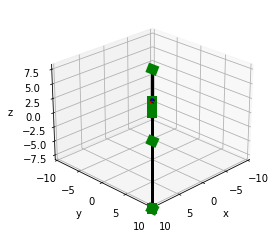

In [142]:
%matplotlib inline
# Se puede alternar usando la opción: %matplotlib notebook

alims = [[-10,10],[-10,10],[-8, 8]]
TX340.plot([0, 0, 0, 0,0,0], axlimits=alims)

#### 4. Simulación del Robot

In [145]:
%matplotlib qt

ImportError: Failed to import any qt binding

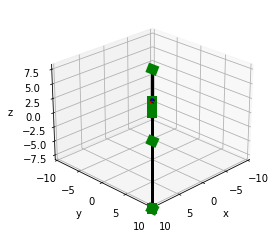

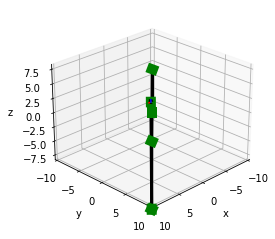

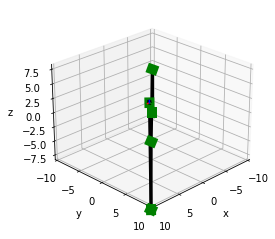

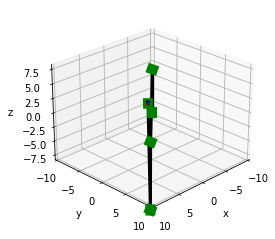

In [144]:
# Se abrirá una nueva ventana donde se visualizará el robot
for i in range(4):
    q = [np.deg2rad(i), np.deg2rad(-0.6*i), np.deg2rad(0.5*i), np.deg2rad(0.6*i),np.deg2rad(-0.6*i), np.deg2rad(-0.6*i)]    # En grados
    TX340P=TX340.plot(q, axlimits=alims)
    plt.pause(0.1)      